In [ ]:
#https://youtu.be/zBOavqh3kWU
# CLASSIFICATION OF IMAGE DATASET TO LEARN THE  IMAGE FEATURE AND CLASSIFY THE UNKNOWN INTO  VARIOUS CATEGORIES
# APPLYING RESNET ON THE DATASET CATEGORSING ANIMALS, VEHICLES, PLANETS, HUMANS, ASTEROIDS, PLANTS, MOUNTAINS, BOOKS , MOBILES, FOOD
# Data category = 10

In [ ]:
#!pip install qiskit-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 152 kB 27.3 MB/s 
     |████████████████████████████████| 95 kB 5.8 MB/s 
     |████████████████████████████████| 4.8 MB 52.5 MB/s 
     |████████████████████████████████| 943 kB 58.2 MB/s 
     |████████████████████████████████| 50 kB 2.4 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 1.9 MB 58.4 MB/s 
     |████████████████████████████████| 112 kB 57.1 MB/s 
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [1]:
from keras.models import  Sequential
from keras import models, layers
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.core.activation import Activation
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_hub as hub
import PIL.Image as Image
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
# from tensorflow.keras.models import Model
from glob import glob
import os
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
import cv2
#from qiskit import algorithms

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [ ]:
trainSet_Path = "/content/drive/MyDrive/Colab Notebooks/Train" 
#https://drive.google.com/drive/folders/1WHR55HYdYsajCFM0URpkZj6VZ2qfP0sS?usp=sharing
#Test
testSet_Path = "/content/drive/MyDrive/Colab Notebooks/Test"
#https://drive.google.com/drive/folders/15euCQaubjtaNaVrhUBRdkNOkIlz_gMoK?usp=sharing

In [ ]:
img_data, class_name =create_dataset(trainSet_Path)

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
print(target_dict)

{'ANIMALS': 0, 'ASTEROIDS': 1, 'BOOKS': 2, 'FOOD': 3, 'HUMANS': 4, 'MOBILES': 5, 'MOUNTAINS': 6, 'PLANETS': 7, 'PLANTS': 8, 'VEHICLES': 9}


In [ ]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
print(target_val)

[6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0]


In [ ]:
from keras.layers.serialization import activation
from scipy.ndimage.morphology import filters
from keras.engine import input_layer

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
#    input_shape=(4,4,1)))
# model.compile('adam', 'mean_squared_error')


model = tf.keras.Sequential(
    [  
      # first convolution layer
      tf.keras.layers.Conv2D(32, (3, 3), activation="relu",
                          input_shape=(200, 200, 3)),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),

      # second convolution layer
      tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),

      # fully connected classification
      # single vector
      tf.keras.layers.Flatten(),
      
      # hidden layer and output layer
      tf.keras.layers.Dense(1024, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
     
    ]
)


model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x=np.array(img_data, np.float32),
                    y=np.array(list(map(int,target_val)),np.float32), epochs=10, E)

Epoch 1/10
2/2 [==============================] - 1s 100ms/step - loss: 82.9122 - accuracy: 0.0938
Epoch 2/10
2/2 [==============================] - 0s 98ms/step - loss: 21.4668 - accuracy: 0.3281
Epoch 3/10
2/2 [==============================] - 0s 96ms/step - loss: 4.6022 - accuracy: 0.2969
Epoch 4/10
2/2 [==============================] - 0s 96ms/step - loss: 1.5204 - accuracy: 0.5469
Epoch 5/10
2/2 [==============================] - 0s 103ms/step - loss: 2.4422 - accuracy: 0.5469
Epoch 6/10
2/2 [==============================] - 0s 99ms/step - loss: 0.7446 - accuracy: 0.8125
Epoch 7/10
2/2 [==============================] - 0s 99ms/step - loss: 0.3125 - accuracy: 0.9531
Epoch 8/10
2/2 [==============================] - 0s 102ms/step - loss: 0.0423 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 102ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 97ms/step - loss: 0.0091 - accuracy: 1.0000


In [ ]:
#RESNET

**RESNET TRAINING on SAME SAMPLES**


In [ ]:
IMAGE_SHAPE = [224,224]

In [ ]:
resnetModel = ResNet50(weights='imagenet',include_top=False, input_shape=IMAGE_SHAPE+[3])

In [ ]:
for layers in resnetModel.layers:
  layers.trainable= False

In [ ]:
folders = glob(trainSet_Path+"/*")
folders

['/content/drive/MyDrive/Colab Notebooks/Train/MOUNTAINS',
 '/content/drive/MyDrive/Colab Notebooks/Train/MOBILES',
 '/content/drive/MyDrive/Colab Notebooks/Train/VEHICLES',
 '/content/drive/MyDrive/Colab Notebooks/Train/PLANETS',
 '/content/drive/MyDrive/Colab Notebooks/Train/BOOKS',
 '/content/drive/MyDrive/Colab Notebooks/Train/ASTEROIDS',
 '/content/drive/MyDrive/Colab Notebooks/Train/HUMANS',
 '/content/drive/MyDrive/Colab Notebooks/Train/FOOD',
 '/content/drive/MyDrive/Colab Notebooks/Train/PLANTS',
 '/content/drive/MyDrive/Colab Notebooks/Train/ANIMALS']

In [ ]:
x = Flatten()(resnetModel.output)

In [ ]:
predict = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs = resnetModel.input,  outputs= predict )

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_data.flow_from_directory(trainSet_Path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 64 images belonging to 10 classes.


In [ ]:
test_set = test_data.flow_from_directory(testSet_Path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 64 images belonging to 10 classes.


In [ ]:
modelSave = model.fit(train_set, validation_data=test_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/10
2/2 [==============================] - 27s 21s/step - loss: 6.8875 - accuracy: 0.3125 - val_loss: 5.6361 - val_accuracy: 0.4688
Epoch 2/10
2/2 [==============================] - 24s 19s/step - loss: 6.6418 - accuracy: 0.3281 - val_loss: 6.1242 - val_accuracy: 0.3906
Epoch 3/10
2/2 [==============================] - 32s 22s/step - loss: 6.3753 - accuracy: 0.3438 - val_loss: 5.3069 - val_accuracy: 0.4062
Epoch 4/10
2/2 [==============================] - 33s 25s/step - loss: 5.1178 - accuracy: 0.3906 - val_loss: 4.4589 - val_accuracy: 0.2969
Epoch 5/10
2/2 [==============================] - 22s 16s/step - loss: 4.0348 - accuracy: 0.3594 - val_loss: 2.7564 - val_accuracy: 0.4219
Epoch 6/10
2/2 [==============================] - 21s 16s/step - loss: 2.4230 - accuracy: 0.4688 - val_loss: 1.5067 - val_accuracy: 0.4531
Epoch 7/10
2/2 [==============================] - 31s 25s/step - loss: 1.7951 - accuracy: 0.4688 - val_loss: 2.1264 - val_accuracy: 0.5000
Epoch 8/10
2/2 [===========

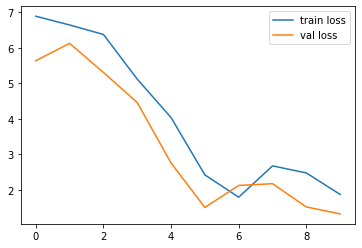

In [ ]:
plt.plot(modelSave.history['loss'], label='train loss')
plt.plot(modelSave.history['val_loss'], label='val loss')
plt.legend()
plt.show()

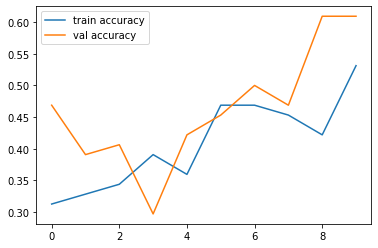

In [ ]:
plt.plot(modelSave.history['accuracy'], label='train accuracy')
plt.plot(modelSave.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([5, 0, 9, 2, 1, 6, 1, 2, 8, 8, 1, 1, 1, 9, 1, 1, 1, 1, 1, 6, 5, 1,
       4, 9, 1, 5, 9, 1, 5, 5, 6, 6, 4, 1, 5, 1, 5, 3, 9, 8, 0, 5, 1, 1,
       1, 3, 1, 1, 5, 9, 1, 9, 5, 1, 1, 4, 7, 0, 5, 1, 5, 1, 7, 9])

In [ ]:
imgtoTest = image.load_img('/content/drive/MyDrive/Colab Notebooks/food.jpg', target_size=(224,224))

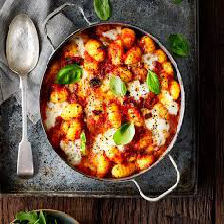

In [ ]:
imgtoTest

In [ ]:
find = np.array(imgtoTest)
find

array([[[122, 120, 123],
        [112, 110, 113],
        [106, 104, 107],
        ...,
        [ 19,   5,   2],
        [ 20,   6,   3],
        [ 21,   7,   4]],

       [[103, 101, 102],
        [112, 110, 111],
        [102, 100, 101],
        ...,
        [ 19,   5,   2],
        [ 20,   6,   3],
        [ 20,   6,   3]],

       [[ 95,  93,  94],
        [110, 108, 109],
        [105, 103, 104],
        ...,
        [ 19,   5,   2],
        [ 19,   5,   2],
        [ 20,   6,   3]],

       ...,

       [[130,  85,  54],
        [ 98,  63,  43],
        [ 51,  29,  18],
        ...,
        [ 82,  56,  43],
        [ 66,  42,  30],
        [ 68,  44,  34]],

       [[132,  85,  55],
        [109,  74,  54],
        [ 50,  28,  17],
        ...,
        [ 91,  65,  52],
        [ 63,  39,  27],
        [ 71,  47,  37]],

       [[123,  76,  46],
        [101,  64,  45],
        [ 56,  32,  22],
        ...,
        [100,  74,  61],
        [ 60,  36,  24],
        [ 74,  50,  40]]

In [ ]:
find = find/255

In [ ]:
find

array([[[0.47843137, 0.47058824, 0.48235294],
        [0.43921569, 0.43137255, 0.44313725],
        [0.41568627, 0.40784314, 0.41960784],
        ...,
        [0.0745098 , 0.01960784, 0.00784314],
        [0.07843137, 0.02352941, 0.01176471],
        [0.08235294, 0.02745098, 0.01568627]],

       [[0.40392157, 0.39607843, 0.4       ],
        [0.43921569, 0.43137255, 0.43529412],
        [0.4       , 0.39215686, 0.39607843],
        ...,
        [0.0745098 , 0.01960784, 0.00784314],
        [0.07843137, 0.02352941, 0.01176471],
        [0.07843137, 0.02352941, 0.01176471]],

       [[0.37254902, 0.36470588, 0.36862745],
        [0.43137255, 0.42352941, 0.42745098],
        [0.41176471, 0.40392157, 0.40784314],
        ...,
        [0.0745098 , 0.01960784, 0.00784314],
        [0.0745098 , 0.01960784, 0.00784314],
        [0.07843137, 0.02352941, 0.01176471]],

       ...,

       [[0.50980392, 0.33333333, 0.21176471],
        [0.38431373, 0.24705882, 0.16862745],
        [0.2       , 0

In [ ]:
find.shape

(224, 224, 3)

In [ ]:
find = np.expand_dims(find, axis=0)

In [ ]:
find.shape

(1, 224, 224, 3)

In [ ]:
findResult = np.argmax(model.predict(find), axis=1)

In [ ]:
findResult

array([3])